## Clustering Professional Basketball Player Based on Performance

Analysing Player performance stats for NBA season 2020-2021.
Basketball players are traditionally grouped into five distinct positions, but these designations are quickly becoming outdated. This study is an attempt to reclassify players into new groups based on personal performance in the 2020-2021 NBA regular season.

Is  it  possible  that  a  new  player  designation  can  be  determined  based  on  the  actual performance of modern basketball players?  If such a designation is found, could it be used to build a strong basketball team?

## Importing Relevant Libraries



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as mno
sns.set_style("whitegrid", {"grid.color": ".2", "grid.linestyle": ":"})

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Reading Dataset(s)

In [3]:
#reading data
players = pd.read_csv('../input/nba-players-data-1950-to-2021/player_data.csv')
seasons_stats = pd.read_csv('../input/nba-players-data-1950-to-2021/seasons_stats.csv', index_col = 0)

### Rudimentary inspection of dataset.

In [4]:
players.shape, seasons_stats.shape

((4979, 8), (27352, 50))

In [5]:
players.head()

,Player,From,To,Pos,Ht,Wt,Birth Date,Colleges
0,Alaa Abdelnaby,1991,1995,F-C,6-10,240.0,June 24 1968,Duke
1,Zaid Abdul-Aziz,1969,1978,C-F,6-9,235.0,April 7 1946,Iowa State
2,Kareem Abdul-Jabbar*,1970,1989,C,7-2,225.0,April 16 1947,UCLA
3,Mahmoud Abdul-Rauf,1991,2001,G,6-1,162.0,March 9 1969,LSU
4,Tariq Abdul-Wahad,1998,2003,F,6-6,223.0,November 3 1974,Michigan San Jose State


In [6]:
players.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4979 entries, 0 to 4978
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Player      4979 non-null   object 
 1   From        4979 non-null   int64  
 2   To          4979 non-null   int64  
 3   Pos         4979 non-null   object 
 4   Ht          4979 non-null   object 
 5   Wt          4974 non-null   float64
 6   Birth Date  4961 non-null   object 
 7   Colleges    4628 non-null   object 
dtypes: float64(1), int64(2), object(5)
memory usage: 311.3+ KB


In [7]:
seasons_stats.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,144.0,516.0,...,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,102.0,274.0,...,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,174.0,499.0,...,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,22.0,86.0,...,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,21.0,82.0,...,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN


In [8]:
seasons_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27352 entries, 0 to 27422
Data columns (total 50 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    27352 non-null  float64
 1   Player  27352 non-null  object 
 2   Pos     27352 non-null  object 
 3   Age     27344 non-null  float64
 4   Tm      27352 non-null  object 
 5   G       27352 non-null  float64
 6   GS      20961 non-null  float64
 7   MP      26866 non-null  float64
 8   FG      27352 non-null  float64
 9   FGA     27352 non-null  float64
 10  FG%     27239 non-null  float64
 11  3P      21655 non-null  float64
 12  3PA     21655 non-null  float64
 13  3P%     17962 non-null  float64
 14  2P      27352 non-null  float64
 15  2PA     27352 non-null  float64
 16  2P%     27179 non-null  float64
 17  eFG%    27239 non-null  float64
 18  FT      27352 non-null  float64
 19  FTA     27352 non-null  float64
 20  FT%     26331 non-null  float64
 21  ORB     23525 non-null  float64
 22

In [9]:
#statistical summary of numerical columns in players

players.describe()

,From,To,Wt
count,4979.000000,4979.000000,4974.000000
mean,1988.461137,1992.666600,209.363088
std,22.410176,23.114979,26.005700
min,1947.000000,1947.000000,114.000000
25%,1971.000000,1975.000000,190.000000
50%,1990.000000,1996.000000,210.000000
75%,2008.000000,2014.000000,225.000000
max,2022.000000,2022.000000,360.000000


In [10]:
#statistical summary of numerical columns in seasons_stats

seasons_stats.describe()

,Year,Age,G,GS,MP,FG,FGA,FG%,3P,3PA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
count,27352.000000,27344.000000,27352.000000,20961.000000,26866.00000,27352.000000,27352.000000,27239.000000,21655.000000,21655.000000,...,22297.000000,22368.000000,27313.000000,27313.000000,27313.000000,26829.000000,23525.000000,23525.000000,23525.000000,23525.000000
mean,1995.279614,26.597608,49.800271,22.931969,1179.36924,191.013052,420.671688,0.431854,24.944401,70.984853,...,14.797533,18.851641,1.227214,1.195819,2.424208,0.065659,-1.747643,-0.512548,-2.260089,0.544982
std,18.403073,3.873533,26.516151,28.166115,928.76463,185.558391,392.464513,0.097926,41.307258,109.553575,...,6.925300,5.484929,2.091940,1.244676,3.001926,0.104268,4.042330,2.244615,5.013543,1.309428
min,1950.000000,18.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-5.100000,-1.000000,-2.800000,-2.519000,-73.800000,-31.100000,-86.700000,-2.600000
25%,1983.000000,24.000000,26.000000,0.000000,325.00000,39.000000,95.000000,0.393000,0.000000,1.000000,...,11.100000,15.300000,-0.100000,0.200000,0.200000,0.031000,-3.400000,-1.600000,-4.100000,-0.200000
50%,1998.000000,26.000000,56.000000,8.000000,1018.00000,136.000000,309.000000,0.439000,4.000000,15.000000,...,13.900000,18.500000,0.400000,0.800000,1.300000,0.076000,-1.500000,-0.500000,-1.800000,0.000000
75%,2011.000000,29.000000,75.000000,43.000000,1917.00000,291.000000,645.000000,0.481000,33.000000,99.000000,...,17.400000,22.100000,1.900000,1.800000,3.700000,0.115000,0.300000,0.700000,0.300000,0.800000
max,2021.000000,44.000000,88.000000,83.000000,3882.00000,1597.000000,3159.000000,1.000000,402.000000,1028.000000,...,100.000000,100.000000,18.300000,16.000000,25.400000,2.712000,199.400000,46.800000,242.200000,12.400000


Seasons stats since 3 points shooting was implemented in NBA, year 1979

In [11]:
#Data of matches of all the seasons after 1979

df = seasons_stats.loc[seasons_stats['Year'] > 1979]

## Data Cleaning and Initial Preperation

In [12]:
df = seasons_stats.copy()
df.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,144.0,516.0,...,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,102.0,274.0,...,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,174.0,499.0,...,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,22.0,86.0,...,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,21.0,82.0,...,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN


In [13]:
#cheking for duplicates in Player data

players.duplicated().any()

True

In [14]:
#dropping duplicates

players = players[~players.duplicated()]
players.duplicated().any()

False

In [15]:
#cheking for duplicates in seasons' data

df.duplicated().any()

False



> There are no duplicate records in dataset now.



In [16]:
#checking missing values

total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).round(2).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total Missing', 'Percent Missing'])

,Total Missing,Percent Missing
3P%,9390,34.33
GS,6391,23.37
3PAr,5799,21.20
3P,5697,20.83
3PA,5697,20.83
TOV%,5055,18.48
USG%,4984,18.22
TOV,4979,18.20
STL%,3832,14.01
BLK%,3832,14.01


> The data does have missing values, which culd be due to unavailabilty of some statistics in older data. Also, in a season, a player may have not attempted any 3-point shots and therefore did not make any 3-point shots, which makes 
\begin{align}
        3P\% = \frac{(number \space of \space 3-pointers \space scored)}{(number \space of \space 3-pointers \space attempted)}
    \end{align}
a NaN value. Same is the case with 2p, free thows, etc.

<AxesSubplot:>

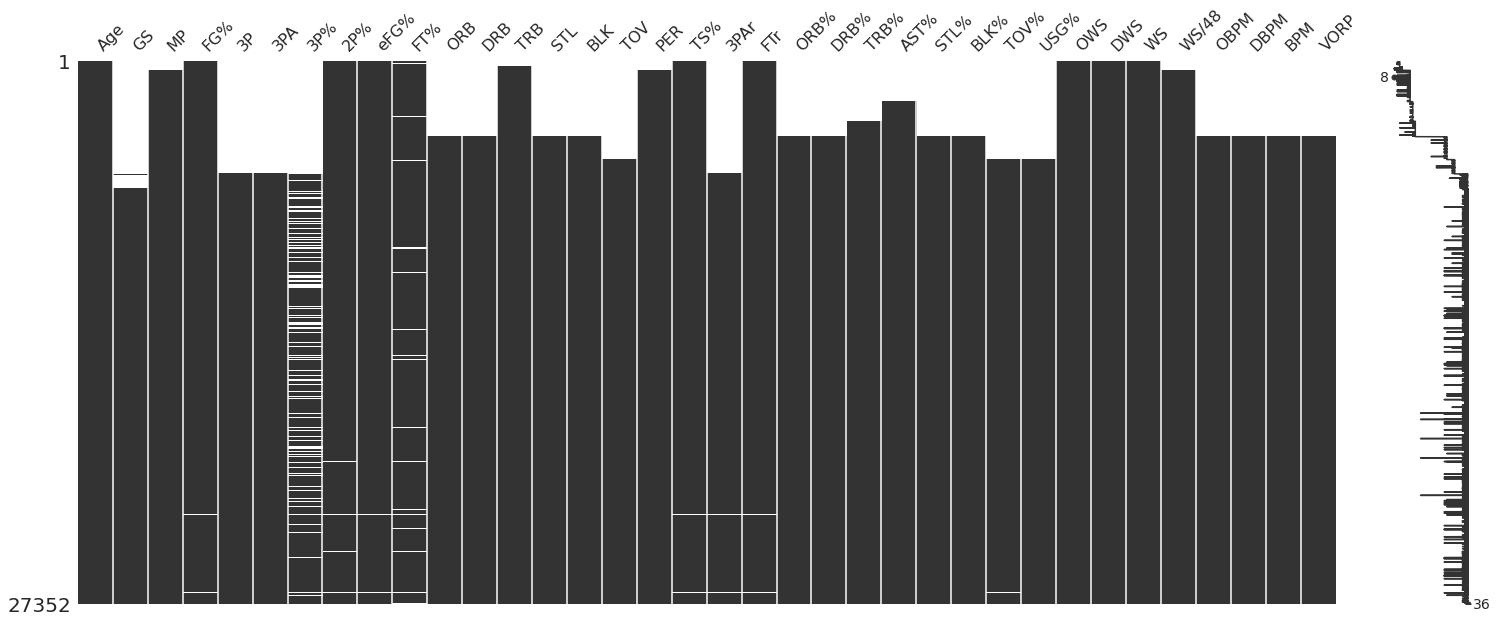

In [17]:
#visualizing columns with missing values
missing_col = [col for col in df.columns if df[col].isna().any()]
mno.matrix(df[missing_col], color = '0.2')

In any given year there are some players who have played for more than one team. For such players there are also records of their cumulative stats for that year. These records can be filtered out. 

In [18]:
#filtering out cumulative records for each player for every year

df = df[~df.duplicated(subset = ['Year', 'Player'], keep = 'first')]
df.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,144.0,516.0,...,NaN,NaN,-0.1,3.6,3.5,NaN,NaN,NaN,NaN,NaN
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,102.0,274.0,...,NaN,NaN,1.6,0.6,2.2,NaN,NaN,NaN,NaN,NaN
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,174.0,499.0,...,NaN,NaN,0.9,2.8,3.6,NaN,NaN,NaN,NaN,NaN
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,22.0,86.0,...,NaN,NaN,-0.5,-0.1,-0.6,NaN,NaN,NaN,NaN,NaN
6,1950.0,Ralph Beard,G,22.0,INO,60.0,NaN,NaN,340.0,936.0,...,NaN,NaN,3.6,1.2,4.8,NaN,NaN,NaN,NaN,NaN


In [19]:
df[df.duplicated(subset = ['Year', 'Player'])]

,Year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP


## Player Performance Metrics (NBA Season 2020-2021)

**Variables that are indicative of performance:**

1. 'PTS' : Points Scored
2. 'FG' : Field Goals Made
3. 'FGA' : Field Goals Attempted
4. 'FG%' : Field Goals %
5. '3P' : 3-Point Field Goals Made
6. '3PA' : 3-Point Field Goals Attempted
7. '3P%' : 3-Point Field Goals %
8. '2P' : 2-Point Field Goals Made
9. '2PA' : 2-Point Field Goals Attempted
10. '2P%' : 2-Point Field Goals %
11. 'FT' : Free Throws Made
12. 'FTA' : Free Throws Attempted
13. 'FT%' : Free Throws %
14. 'ORB' : Offensive Rebounds
15. 'DRB' : Defensive Rebounds
16. 'AST' : Assists
17. 'STL' : Steals
18. 'BLK' : Blocks


In [20]:
features = ['Pos','PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'AST', 'STL', 'BLK']
perf_features = ['PTS', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'AST', 'STL', 'BLK']

In [21]:
# dataset for 2020-21 NBA regular season

df_2021 = df[df['Year'] == float(2021)]
df_2021.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
26718,2021.0,Precious Achiuwa,PF,21.0,MIA,61.0,4.0,737.0,124.0,228.0,...,13.5,19.5,0.3,1.0,1.3,0.085,-3.6,-0.5,-4.1,-0.4
26719,2021.0,Jaylen Adams,PG,24.0,MIL,7.0,0.0,18.0,1.0,8.0,...,0.0,18.6,-0.1,0.0,-0.1,-0.252,-15.1,-4.6,-19.8,-0.1
26720,2021.0,Steven Adams,C,27.0,NOP,58.0,58.0,1605.0,189.0,308.0,...,17.5,11.7,2.3,1.7,4.0,0.119,-0.4,0.1,-0.3,0.7
26721,2021.0,Bam Adebayo,C,23.0,MIA,64.0,64.0,2143.0,456.0,800.0,...,15.0,23.7,5.6,3.2,8.8,0.197,2.9,2.0,4.9,3.7
26722,2021.0,LaMarcus Aldridge,C,35.0,TOT,26.0,23.0,674.0,140.0,296.0,...,7.9,22.2,0.5,0.6,1.1,0.080,-0.2,-0.2,-0.3,0.3


In [22]:
df_2021.shape

(540, 50)

In [23]:
# null values
df_2021[perf_features].isna().sum()

PTS     0
FG      0
FGA     0
FG%     1
3P      0
3PA     0
3P%    19
2P      0
2PA     0
2P%     5
FT      0
FTA     0
FT%    18
ORB     0
DRB     0
AST     0
STL     0
BLK     0
dtype: int64

The data represents player performance in the regular NBA season, but not every player has the same number of games played. Therefore grouping players based on total/cumulative stats is not fair.

This can be resolved by converting the metrics into **per match** stats.

In [24]:
#defining function for per game statistics

def per_game(x):
    return round(x/df_2021['G'], 3)

In [25]:
#df_2021['Pos'] = df_2017.Pos.replace('PF-C', 'PF')
df_2021.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
26718,2021.0,Precious Achiuwa,PF,21.0,MIA,61.0,4.0,737.0,124.0,228.0,...,13.5,19.5,0.3,1.0,1.3,0.085,-3.6,-0.5,-4.1,-0.4
26719,2021.0,Jaylen Adams,PG,24.0,MIL,7.0,0.0,18.0,1.0,8.0,...,0.0,18.6,-0.1,0.0,-0.1,-0.252,-15.1,-4.6,-19.8,-0.1
26720,2021.0,Steven Adams,C,27.0,NOP,58.0,58.0,1605.0,189.0,308.0,...,17.5,11.7,2.3,1.7,4.0,0.119,-0.4,0.1,-0.3,0.7
26721,2021.0,Bam Adebayo,C,23.0,MIA,64.0,64.0,2143.0,456.0,800.0,...,15.0,23.7,5.6,3.2,8.8,0.197,2.9,2.0,4.9,3.7
26722,2021.0,LaMarcus Aldridge,C,35.0,TOT,26.0,23.0,674.0,140.0,296.0,...,7.9,22.2,0.5,0.6,1.1,0.080,-0.2,-0.2,-0.3,0.3


### Deriving per-match stats

In [26]:
#per-match stats

df_pmatch = df_2021[['PTS', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'ORB', 'DRB', 'AST', 'STL', 'BLK']].apply(per_game)

#adding other columns
df_pmatch[['Pos','G','FG%', '3P%', '2P%', 'FT%']] = df_2021[['Pos', 'G','FG%', '3P%', '2P%', 'FT%']]

df_pmatch.head()

,PTS,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,DRB,AST,STL,BLK,Pos,G,FG%,3P%,2P%,FT%
26718,4.984,2.033,3.738,0.000,0.016,2.033,3.721,0.918,1.803,1.197,2.213,0.475,0.328,0.459,PF,61.0,0.544,0.000,0.546,0.509
26719,0.286,0.143,1.143,0.000,0.286,0.143,0.857,0.000,0.000,0.000,0.429,0.286,0.000,0.000,PG,7.0,0.125,0.000,0.167,NaN
26720,7.552,3.259,5.310,0.000,0.052,3.259,5.259,1.034,2.328,3.672,5.190,1.914,0.931,0.655,C,58.0,0.614,0.000,0.620,0.444
26721,18.703,7.125,12.500,0.031,0.125,7.094,12.375,4.422,5.531,2.219,6.734,5.406,1.172,1.031,C,64.0,0.570,0.250,0.573,0.799
26722,13.538,5.385,11.385,1.192,3.077,4.192,8.308,1.577,1.808,0.731,3.808,1.885,0.423,1.115,C,26.0,0.473,0.388,0.505,0.872


## Basketball Player Positions

In Basketball, every player has a role on court. Each team has 5 players on the court at any given time. And each player often has a unique skillset to help their team win. Five distinct positions on court are

* **Point Guard:**  Initiates offensive plays with great passing and dribbling skills.
* **Shooting Guard:**  Positions on the wing with strong 3-point shooting
ability.
* **Small Forward:**  Versatile shooter who can drive to the basket.
* **Power Forward:**  Strong inside presence; scores close and mid-range shots.
* **Center:**  Scores near the basket with strong rebounding and blocking


 However, many times these roles and responsibilities overlap. Oftentimes, positions on different teams will serve different functions based on the type of player they are and the system that they are in. As a result, it can often be difficult to know what each position should be doing.
 
 It has been increasingly apparent, however, that modern National Basketball Associ-ation (NBA) players adopt playstyles that do not quite fit into one of these five positions.For example, many point guards and shooting guards have strong driving skills, and manytaller power forwards and centers have great long-range shooting ability


### Average statistics for players in each of the five classic positions.

In [27]:
df_avg = df_pmatch[df_pmatch.Pos.isin(['C','PG','SG','SF','PF'])].groupby('Pos')[perf_features].mean().round(2)
df_avg

,PTS,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,AST,STL,BLK
Pos,,,,,,,,,,,,,,,,,,
C,8.50,3.33,6.21,0.53,0.42,1.25,0.23,2.91,4.96,0.58,1.42,1.99,0.69,1.69,3.93,1.26,0.49,0.86
PF,8.01,2.96,6.34,0.45,0.83,2.38,0.31,2.13,3.97,0.51,1.25,1.67,0.73,0.89,3.08,1.53,0.54,0.42
PG,9.92,3.58,8.25,0.41,1.20,3.32,0.34,2.39,4.93,0.46,1.55,1.93,0.79,0.44,2.25,3.49,0.75,0.21
SF,8.56,3.10,6.90,0.44,1.11,3.08,0.33,2.00,3.82,0.53,1.25,1.59,0.76,0.68,2.73,1.58,0.64,0.33
SG,9.55,3.44,7.95,0.41,1.37,3.81,0.33,2.07,4.14,0.50,1.30,1.61,0.79,0.47,2.21,1.99,0.64,0.26


In [28]:
# looking at 2p and 3p scored by players in the five positions

p23 = df_avg[['2P','3P']].unstack().reset_index()
p23.columns = ['FG type', 'Position', 'Average']
fig = px.bar(p23, x='Position', y='Average', color='FG type',
             title = 'Average FG made per Match', width = 1000)
fig.show()

### Preprocessing

In [29]:
#scaling the features

df_m = df_pmatch.loc[df_pmatch.Pos.isin(['C','PG','SG','SF','PF'])]
df_m = df_m.fillna(0)
ss = StandardScaler()
df_m[perf_features] = ss.fit_transform(df_m[perf_features])
df_m.shape

(524, 20)

## Dimensionality Reduction Techniques (PCA and t-SNE)

### Principal component analysis (PCA)

In [30]:
from sklearn.decomposition import PCA
X = df_m[perf_features]
pca = PCA(n_components=2)
pca.fit(X)
components = pca.transform(X)
pca_df = pd.DataFrame({'component_1': components[:,0], 'component_2': components[:,1]})

# adding Pos column
posi = df_m['Pos'].reset_index()
posi = posi.drop('index', axis = 1)
c12 = pd.concat([pca_df, posi], axis = 1)
c12.head()

,component_1,component_2,Pos
0,-1.869565,2.506483,PF
1,-5.386902,-0.665877,PG
2,0.535409,4.792150,C
3,5.659635,3.350264,C
4,1.964541,0.452793,C


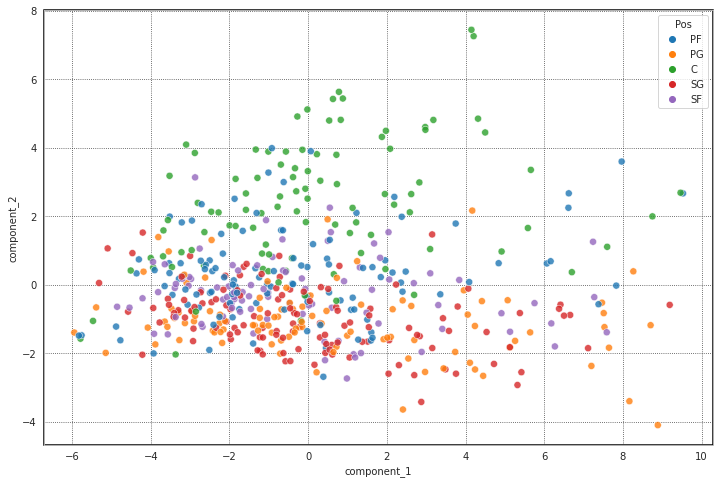

In [31]:
plt.figure(figsize = [12, 8])
ax = sns.scatterplot(c12['component_1'], c12['component_2'], hue = c12['Pos'], s = 50, alpha = 0.8)
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth(1.5) 



> Centers are highly grouped together and PG are also loosely grouped while the other three positions are relatively mixed among each other. There is some visible grouping but rest of it is fuzzy.



### t - Distributed Stochastic Neighbor Embedding (t-SNE)
In contrast to principal component analysis (PCA), a linear dimensionality reduction technique, t-SNE is a non-linear dimensionality reduction technique.  t-SNE is able to take high-dimensional data points that lie on or near a non-linear manifold and preserve the localstructure when mapping onto a low-dimensional space, which is not possible with any linear technique.

In [32]:
from sklearn.manifold import TSNE
X = df_m[perf_features]
X_embedded = TSNE(n_components=2, learning_rate='auto', init='pca', random_state = 21).fit_transform(X)
tsne_df = pd.DataFrame({'component_1': X_embedded[:,0], 'component_2': X_embedded[:,1]})

# adding Pos column
posi = df_m['Pos'].reset_index()
posi = posi.drop('index', axis = 1)
c12 = pd.concat([tsne_df, posi], axis = 1)
c12.head()

,component_1,component_2,Pos
0,-17.686178,11.995784,PF
1,-30.250507,4.451989,PG
2,5.295938,15.582145,C
3,26.876799,5.732455,C
4,11.898246,4.981588,C


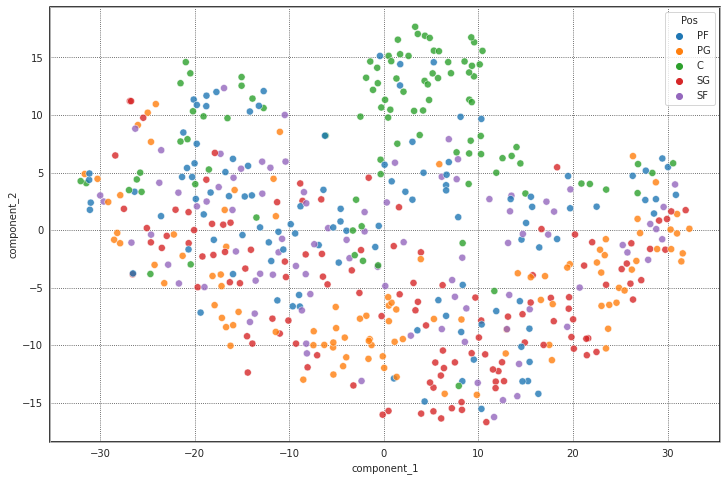

In [33]:
plt.figure(figsize = [12, 8])
ax = sns.scatterplot(c12['component_1'], c12['component_2'], hue = c12['Pos'], s = 50, alpha = 0.8)
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth(1.5) 

## Finding Optimal number of Clusters (k)

Two validation methods will be used to select the best number of clusters (k):
1. Within-sum-of-squares (WSS) or Elbow Method
2. Silhouette score

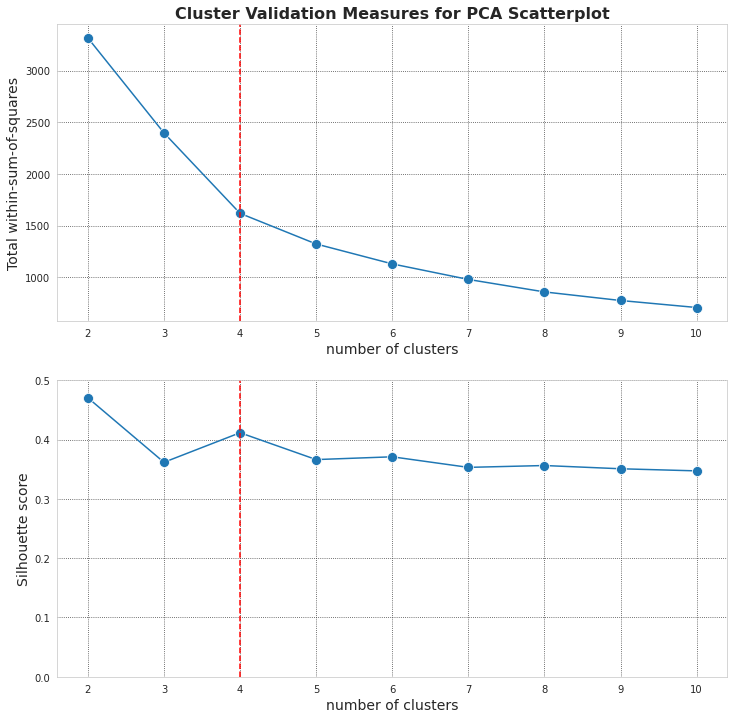

In [34]:
# elbow-curve
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter = 500)
    kmeans.fit(pca_df)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd

plt.figure(figsize = [12, 12])

plt.subplot(2,1,1)
with plt.style.context('seaborn-whitegrid'):
    sns.lineplot(np.arange(2,11,1), ssd, marker='o', markersize = 10)
    plt.xlabel('number of clusters', fontsize = 14)
    plt.axvline(4, ls="--", c="red")
    plt.ylabel('Total within-sum-of-squares', fontsize = 14)
    plt.title('Cluster Validation Measures for PCA Scatterplot', fontsize = 16, fontweight = 'bold')


# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
sil = []
for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter = 500)
    kmeans.fit(pca_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(pca_df, cluster_labels)
    sil.append(silhouette_avg)

plt.subplot(2,1,2)
with plt.style.context('seaborn-whitegrid'):
    sns.lineplot(np.arange(2,11,1), sil, marker='o', markersize = 10)
    plt.yticks(np.arange(0,0.6,0.1))
    plt.xlabel('number of clusters', fontsize = 14)
    plt.axvline(4, ls="--", c="red")
    plt.ylabel('Silhouette score', fontsize = 14)



> 2 is not a meaningful number of clusters, so 4 looks like the best option from PCA scatterplot.



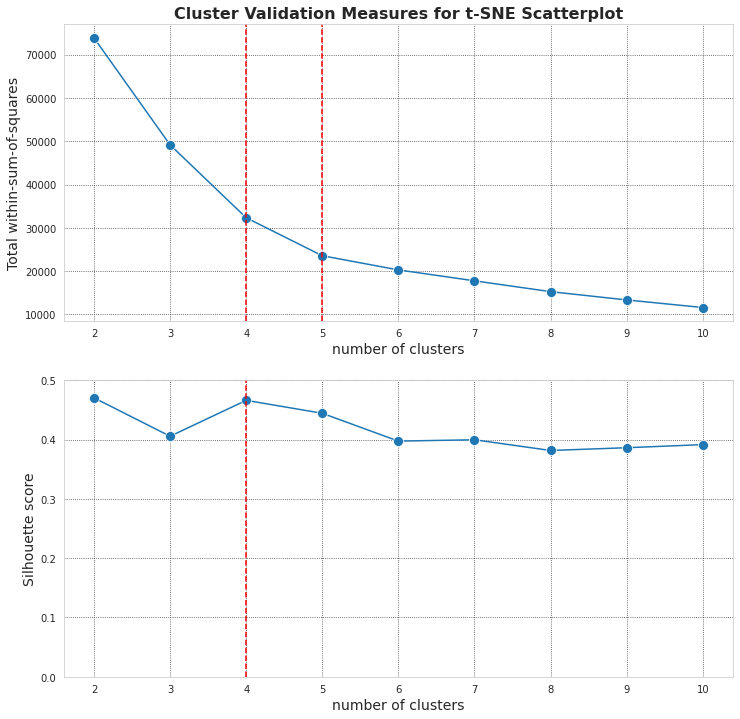

In [35]:
# elbow-curve
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter = 500)
    kmeans.fit(tsne_df)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd

plt.figure(figsize = [12, 12])

plt.subplot(2,1,1)
with plt.style.context('seaborn-whitegrid'):
    sns.lineplot(np.arange(2,11,1), ssd, marker='o', markersize = 10)
    plt.xlabel('number of clusters', fontsize = 14)
    plt.axvline(4, ls="--", c="red")
    plt.axvline(5, ls="--", c="red")
    plt.ylabel('Total within-sum-of-squares', fontsize = 14)
    plt.title('Cluster Validation Measures for t-SNE Scatterplot', fontsize = 16, fontweight = 'bold')


# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
sil = []
for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter = 500)
    kmeans.fit(tsne_df)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(tsne_df, cluster_labels)
    sil.append(silhouette_avg)

plt.subplot(2,1,2)
with plt.style.context('seaborn-whitegrid'):
    sns.lineplot(np.arange(2,11,1), sil, marker='o', markersize = 10)
    plt.yticks(np.arange(0,0.6,0.1))
    plt.xlabel('number of clusters', fontsize = 14)
    plt.axvline(4, ls="--", c="red")
    plt.ylabel('Silhouette score', fontsize = 14)

> All the cluster validation measures suggest that 4 is the optimal number of clusters.

### Clustering Tendency of Data
The **Hopkins statistic** is used to assess the clustering tendency of a data set by measuring the probability that a given data set is generated by a uniform data distribution. In other words, it tests the spatial randomness of the data.

A value for H higher than 0.75 indicates a clustering tendency at the 90% confidence level.

We can conduct the Hopkins Statistic test iteratively, using 0.5 as the threshold to reject the alternative hypothesis. That is, if H < 0.5, then it is unlikely that D has statistically significant clusters.

Put in other words, If the value of Hopkins statistic is close to 1, then we can reject the null hypothesis and conclude that the dataset D is significantly a clusterable data.

In [36]:
!pip install pyclustertend

In [37]:
from pyclustertend import hopkins ## the hopkins test
X = df_m[perf_features]
1 - hopkins(X.values, X.shape[0])

0.8312526365729108

This indicates that data indeed has very good clustering tendency.

## K-Means

In [38]:
#scaling the features

df_m = df_pmatch.copy()
df_m = df_m.fillna(0)
ss = StandardScaler()
df_m[perf_features] = ss.fit_transform(df_m[perf_features])
df_m.shape

(540, 20)

In [39]:
#model with k=4

X = df_m[perf_features]
kmeans = KMeans(n_clusters = 4, init='k-means++', max_iter = 1000, random_state = 25)
kmeans.fit(X)

KMeans(max_iter=1000, n_clusters=4, random_state=25)

In [40]:
df_clusters = df_pmatch.copy()

In [41]:
#assign the label
df_clusters['kmeans_id'] = kmeans.labels_
df_m['kmeans_id'] = kmeans.labels_

df_clusters.head()

,PTS,FG,FGA,3P,3PA,2P,2PA,FT,FTA,ORB,...,AST,STL,BLK,Pos,G,FG%,3P%,2P%,FT%,kmeans_id
26718,4.984,2.033,3.738,0.000,0.016,2.033,3.721,0.918,1.803,1.197,...,0.475,0.328,0.459,PF,61.0,0.544,0.000,0.546,0.509,0
26719,0.286,0.143,1.143,0.000,0.286,0.143,0.857,0.000,0.000,0.000,...,0.286,0.000,0.000,PG,7.0,0.125,0.000,0.167,NaN,3
26720,7.552,3.259,5.310,0.000,0.052,3.259,5.259,1.034,2.328,3.672,...,1.914,0.931,0.655,C,58.0,0.614,0.000,0.620,0.444,0
26721,18.703,7.125,12.500,0.031,0.125,7.094,12.375,4.422,5.531,2.219,...,5.406,1.172,1.031,C,64.0,0.570,0.250,0.573,0.799,1
26722,13.538,5.385,11.385,1.192,3.077,4.192,8.308,1.577,1.808,0.731,...,1.885,0.423,1.115,C,26.0,0.473,0.388,0.505,0.872,2


## Interpreting the Clusters

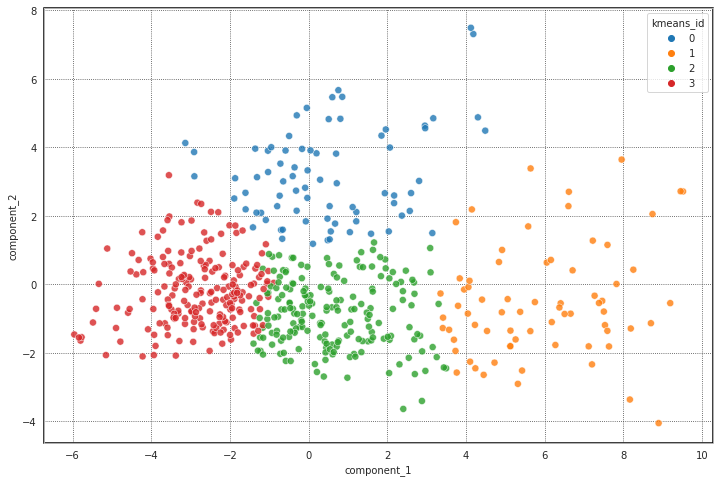

In [42]:
#applying PCA again

X = df_m[perf_features]
pca = PCA(n_components=2)
pca.fit(X)
components = pca.transform(X)
pca_df = pd.DataFrame({'component_1': components[:,0], 'component_2': components[:,1]})
pca_df['kmeans_id'] = kmeans.labels_

plt.figure(figsize = [12, 8])
ax = sns.scatterplot(pca_df['component_1'], pca_df['component_2'], hue = pca_df['kmeans_id'], s = 50, alpha = 0.8, palette = 'tab10')
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth(1.5)

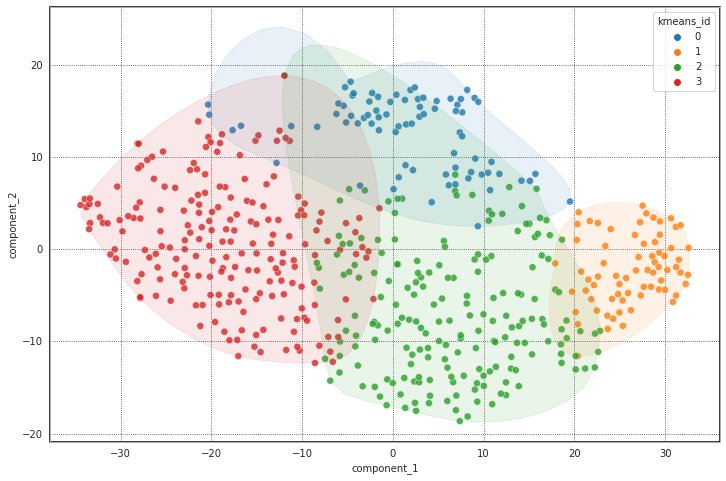

In [43]:
#applying t-SNE again

X = df_m[perf_features]
X_embedded = TSNE(n_components=2, learning_rate='auto', init='pca', random_state = 21).fit_transform(X)
tsne_df = pd.DataFrame({'component_1': X_embedded[:,0], 'component_2': X_embedded[:,1]})
tsne_df['kmeans_id'] = kmeans.labels_

plt.figure(figsize = [12, 8])
ax = sns.scatterplot(tsne_df['component_1'], tsne_df['component_2'], hue = tsne_df['kmeans_id'], s = 50, alpha = 0.8, palette = 'tab10')
ax.patch.set_edgecolor('black')
ax.patch.set_linewidth(1.5)


# draw enclosure
from scipy.spatial import ConvexHull
from scipy import interpolate

colors = ['#1F77B4','#FF7F0e','#2CA02C','#D62728']
for i in tsne_df['kmeans_id'].unique():
    points = tsne_df[tsne_df.kmeans_id == i][['component_1', 'component_2']].values
    # get convex hull
    hull = ConvexHull(points)
    # get x and y coordinates
    # repeat last point to close the polygon
    x_hull = np.append(points[hull.vertices,0],
                       points[hull.vertices,0][0])
    y_hull = np.append(points[hull.vertices,1],
                       points[hull.vertices,1][0])
    # interpolate
    dist = np.sqrt((x_hull[:-1] - x_hull[1:])**2 + (y_hull[:-1] - y_hull[1:])**2)
    dist_along = np.concatenate(([0], dist.cumsum()))
    spline, u = interpolate.splprep([x_hull, y_hull], 
                                    u=dist_along, s=0)
    interp_d = np.linspace(dist_along[0], dist_along[-1], 50)
    interp_x, interp_y = interpolate.splev(interp_d, spline)
    # plot shape
    plt.fill(interp_x, interp_y, '--', c = colors[i], alpha=0.1)

### Looking at how players in different positions constitute the clusters.

<AxesSubplot:xlabel='Pos', ylabel='kmeans_id'>

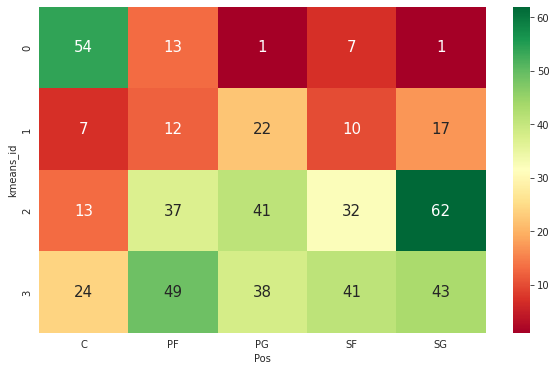

In [44]:
gp = df_clusters.groupby(['kmeans_id', 'Pos'])['PTS'].count().unstack()
gp = gp.loc[:,gp.columns.isin(['C','PF','PG','SF','SG'])]

plt.figure(figsize = [10,6])
sns.heatmap(gp, cmap = 'RdYlGn', annot = True, annot_kws = {'fontsize':15})

> Center players are mostly in cluster 0, SG in cluster 2, PF and SF in cluster 3, and PG constitutes cluster 2 and cluster 3 equally.

### The next step is to characterize our clusters; what do players in each cluster excel at?

In [45]:
# number of players in each cluster

df_clusters.kmeans_id.value_counts()

3    202
2    191
0     77
1     70
Name: kmeans_id, dtype: int64

In [46]:
# average stats of players in each cluster

df_clusters.groupby('kmeans_id')[perf_features].mean().round(2)

,PTS,FG,FGA,FG%,3P,3PA,3P%,2P,2PA,2P%,FT,FTA,FT%,ORB,DRB,AST,STL,BLK
kmeans_id,,,,,,,,,,,,,,,,,,
0,8.77,3.56,6.31,0.59,0.25,0.88,0.20,3.31,5.43,0.62,1.40,2.07,0.67,2.01,4.14,1.23,0.56,0.96
1,21.81,7.87,16.52,0.48,2.09,5.57,0.36,5.78,10.95,0.53,3.99,4.89,0.82,1.07,4.96,5.22,1.10,0.55
2,10.21,3.69,8.45,0.44,1.51,4.09,0.37,2.17,4.35,0.50,1.32,1.66,0.80,0.65,3.05,2.38,0.78,0.36
3,3.35,1.22,3.03,0.39,0.43,1.38,0.28,0.79,1.65,0.48,0.47,0.66,0.72,0.43,1.34,0.78,0.32,0.20


The Clusters can be interpreted as,

1. Cluster 0 (blue): ***The Bruiser***, moderate scorers, active players, excellent 2P shooting accuracy, very good offensive rebounds and good blocks.
2. Cluster 1 (orange): ***The Carry***, high scorers, very good 3P shooting, good 2P shooting and very good defensive rebounds.
3. Cluster 2 (green): ***The Marksmen***, moderate scorers, good 3P shooting accuracy, descent assists and best steals.
4. Cluster 3 (red): ***The Support***, relatively low scorers, descent 3P shooters, decent free-trow shooting accuracy.


In [47]:
def box_plot(x, y):
    ax = sns.boxplot(x = x, y = y, data = df_clusters, showmeans = True, 
                     meanprops={"marker":"s","markerfacecolor":"white", "markeredgecolor":"crimson"})
    ax.set_ylabel(y, fontsize = 14)
    ax.set_xlabel('Cluster ID', fontsize = 14)
    ax.set_title('{}'.format(y), fontsize = 16, fontweight = 'bold')
    ax.patch.set_edgecolor('black')
    ax.patch.set_linewidth(1.5)
    plt.show()

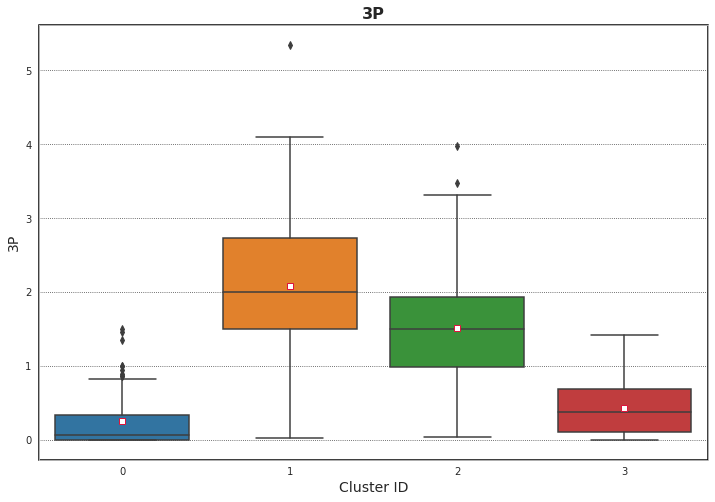

In [48]:
#3P
plt.figure(figsize = [12,8])
box_plot('kmeans_id', '3P')

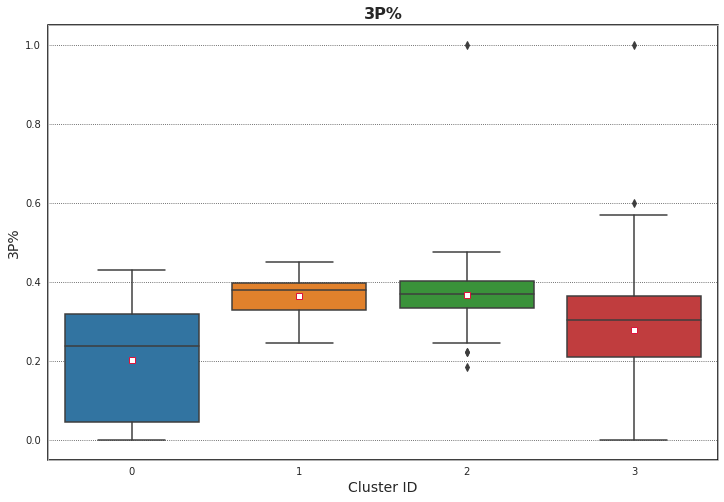

In [49]:
#3P%
plt.figure(figsize = [12,8])
box_plot('kmeans_id', '3P%')

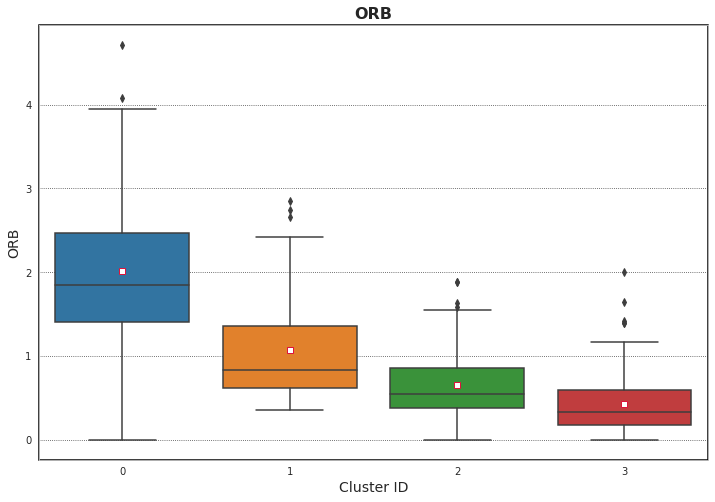

In [50]:
#ORB
plt.figure(figsize = [12,8])
box_plot('kmeans_id', 'ORB')

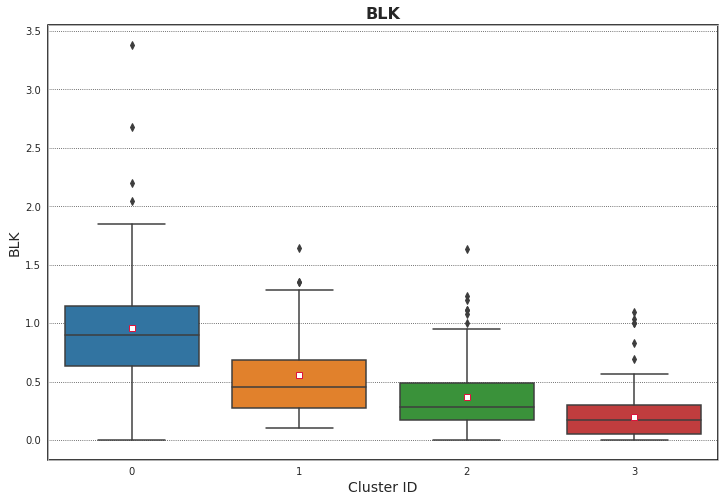

In [51]:
#BLK
plt.figure(figsize = [12,8])
box_plot('kmeans_id', 'BLK')

## Relationship Between Clusters and NBA Team Success

Let's look at how players from the league Champions, Milwaukee Bucks (MIL) in the 2020-2021 NBA season, compare to one of the worst performers of the season, Oklahoma City Thunder (OKC).

In [52]:
df_2021.Tm.unique()

array(['MIA', 'MIL', 'NOP', 'TOT', 'PHO', 'MEM', 'LAL', 'POR', 'ORL',
       'TOR', 'CHI', 'WAS', 'UTA', 'SAC', 'CHO', 'NYK', 'DEN', 'SAS',
       'LAC', 'GSW', 'OKC', 'MIN', 'DET', 'DAL', 'IND', 'ATL', 'CLE',
       'HOU', 'BRK', 'BOS', 'PHI'], dtype=object)

In [53]:
tsne_df['Player'] = df_2021.Player.values
tsne_df['Team'] = df_2021.Tm.values
tsne_df.head()

,component_1,component_2,kmeans_id,Player,Team
0,-17.654879,12.891073,0,Precious Achiuwa,MIA
1,-32.502354,4.901277,3,Jaylen Adams,MIL
2,2.928564,14.346715,0,Steven Adams,NOP
3,27.923687,3.863824,1,Bam Adebayo,MIA
4,12.824335,6.713831,2,LaMarcus Aldridge,TOT


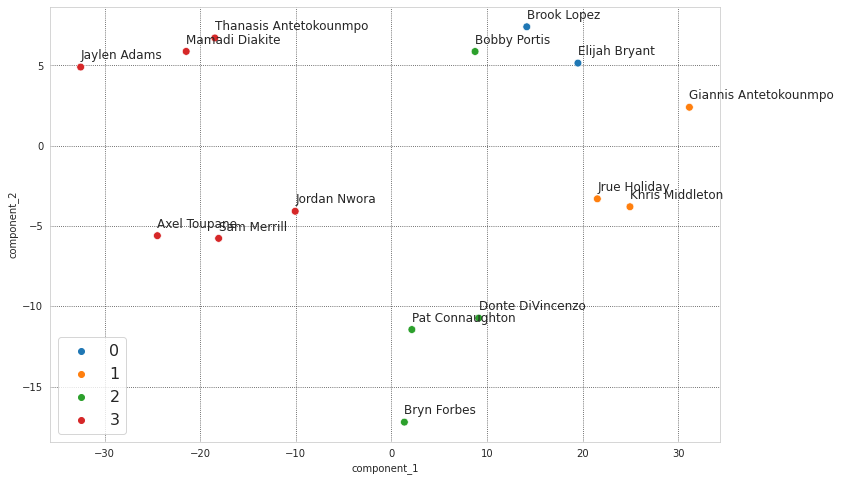

In [54]:
plt.figure(figsize = [12, 8])
mil = tsne_df.loc[tsne_df.Team == 'MIL',['component_1', 'component_2', 'kmeans_id', 'Player']]
sns.scatterplot(mil['component_1'], mil['component_2'], hue = mil['kmeans_id'], s = 60, alpha = 1, palette = 'tab10')

for i in range(len(mil)):
    plt.text(mil.component_1.iloc[i], mil.component_2.iloc[i] + 0.5, mil.Player.iloc[i], fontsize = 12)

plt.legend(loc = 'lower left', fontsize = 16)

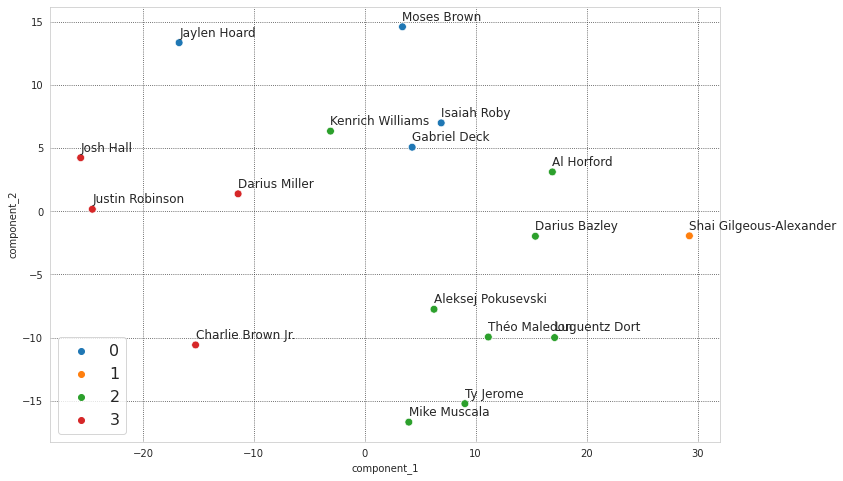

In [55]:
plt.figure(figsize = [12, 8])
okc = tsne_df.loc[tsne_df.Team == 'OKC',['component_1', 'component_2', 'kmeans_id', 'Player']]
sns.scatterplot(okc['component_1'], okc['component_2'], hue = okc['kmeans_id'], s = 60, alpha = 1, palette = 'tab10')

for i in range(len(okc)):
    plt.text(okc.component_1.iloc[i], okc.component_2.iloc[i] + 0.5, okc.Player.iloc[i], fontsize = 12)

plt.legend(loc = 'lower left', fontsize = 16)

## Importance of Players in Each Cluster

In order to understand if players in one cluster are more important in a team's success than the others, team rank can be visualized against fraction of player in each cluster.

In [56]:
df_2021['cluster_id'] = df_m['kmeans_id']

In [57]:
team_ranks = pd.read_csv('../input/nba-team-ranks-202021/team_rank.csv').iloc[:,:3]
team_ranks.head()

,Rk,Team,Tm
0,1,Utah Jazz,UTA
1,2,Los Angeles Clippers,LAC
2,3,Phoenix Suns,PHO
3,4,Milwaukee Bucks,MIL
4,5,Philadelphia 76ers,PHI


In [58]:
df_2021.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,cluster_id
26718,2021.0,Precious Achiuwa,PF,21.0,MIA,61.0,4.0,737.0,124.0,228.0,...,19.5,0.3,1.0,1.3,0.085,-3.6,-0.5,-4.1,-0.4,0
26719,2021.0,Jaylen Adams,PG,24.0,MIL,7.0,0.0,18.0,1.0,8.0,...,18.6,-0.1,0.0,-0.1,-0.252,-15.1,-4.6,-19.8,-0.1,3
26720,2021.0,Steven Adams,C,27.0,NOP,58.0,58.0,1605.0,189.0,308.0,...,11.7,2.3,1.7,4.0,0.119,-0.4,0.1,-0.3,0.7,0
26721,2021.0,Bam Adebayo,C,23.0,MIA,64.0,64.0,2143.0,456.0,800.0,...,23.7,5.6,3.2,8.8,0.197,2.9,2.0,4.9,3.7,1
26722,2021.0,LaMarcus Aldridge,C,35.0,TOT,26.0,23.0,674.0,140.0,296.0,...,22.2,0.5,0.6,1.1,0.080,-0.2,-0.2,-0.3,0.3,2


In [59]:
tdf = df_2021.merge(team_ranks, how = 'inner', on = 'Tm')
tdf.head()

,Year,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,cluster_id,Rk,Team
0,2021.0,Precious Achiuwa,PF,21.0,MIA,61.0,4.0,737.0,124.0,228.0,...,1.0,1.3,0.085,-3.6,-0.5,-4.1,-0.4,0,16,Miami Heat
1,2021.0,Bam Adebayo,C,23.0,MIA,64.0,64.0,2143.0,456.0,800.0,...,3.2,8.8,0.197,2.9,2.0,4.9,3.7,1,16,Miami Heat
2,2021.0,Trevor Ariza,SF,35.0,MIA,30.0,27.0,841.0,99.0,241.0,...,1.0,1.6,0.091,-1.2,0.1,-1.1,0.2,2,16,Miami Heat
3,2021.0,Jimmy Butler,SF,31.0,MIA,52.0,52.0,1745.0,366.0,736.0,...,2.7,9.3,0.255,5.4,2.3,7.7,4.3,1,16,Miami Heat
4,2021.0,Dewayne Dedmon,C,31.0,MIA,16.0,0.0,210.0,46.0,65.0,...,0.4,1.1,0.256,1.2,0.5,1.7,0.2,0,16,Miami Heat


In [60]:
#fraction of players for each team in every cluster

for i in range(4):
    for t in tdf.Tm.unique():
        team_ranks.loc[team_ranks.Tm == t, 'cluster_{}'.format(i)] = tdf[tdf.Tm == t].cluster_id.map(lambda x: 1 if x == i else 0).mean()

In [61]:
team_ranks.head()

,Rk,Team,Tm,cluster_0,cluster_1,cluster_2,cluster_3
0,1,Utah Jazz,UTA,0.125000,0.062500,0.375000,0.437500
1,2,Los Angeles Clippers,LAC,0.133333,0.133333,0.466667,0.266667
2,3,Phoenix Suns,PHO,0.066667,0.133333,0.333333,0.466667
3,4,Milwaukee Bucks,MIL,0.133333,0.200000,0.266667,0.400000
4,5,Philadelphia 76ers,PHI,0.055556,0.166667,0.277778,0.500000


In [62]:
import statsmodels.api as sm
#function for building linear regression model using statsmodel api
def build_model(col):
    # Add a constant
    tr = sm.add_constant(team_ranks['Rk'])
    # fitting model to data
    lr = sm.OLS(team_ranks[col], tr).fit()
    return lr

In [63]:
def reg_plot(col):
    sns.regplot(team_ranks['Rk'], team_ranks[col], line_kws={'color':'k'})
    plt.text(15, max(team_ranks[col])-0.01, 'p={}'.format(build_model(col).pvalues[1].round(3)), fontsize = 15, fontweight = 'bold')
    plt.xlabel('Team Rank', fontsize = 14)
    plt.ylabel('Fractions in {}'.format(col), fontsize = 14)

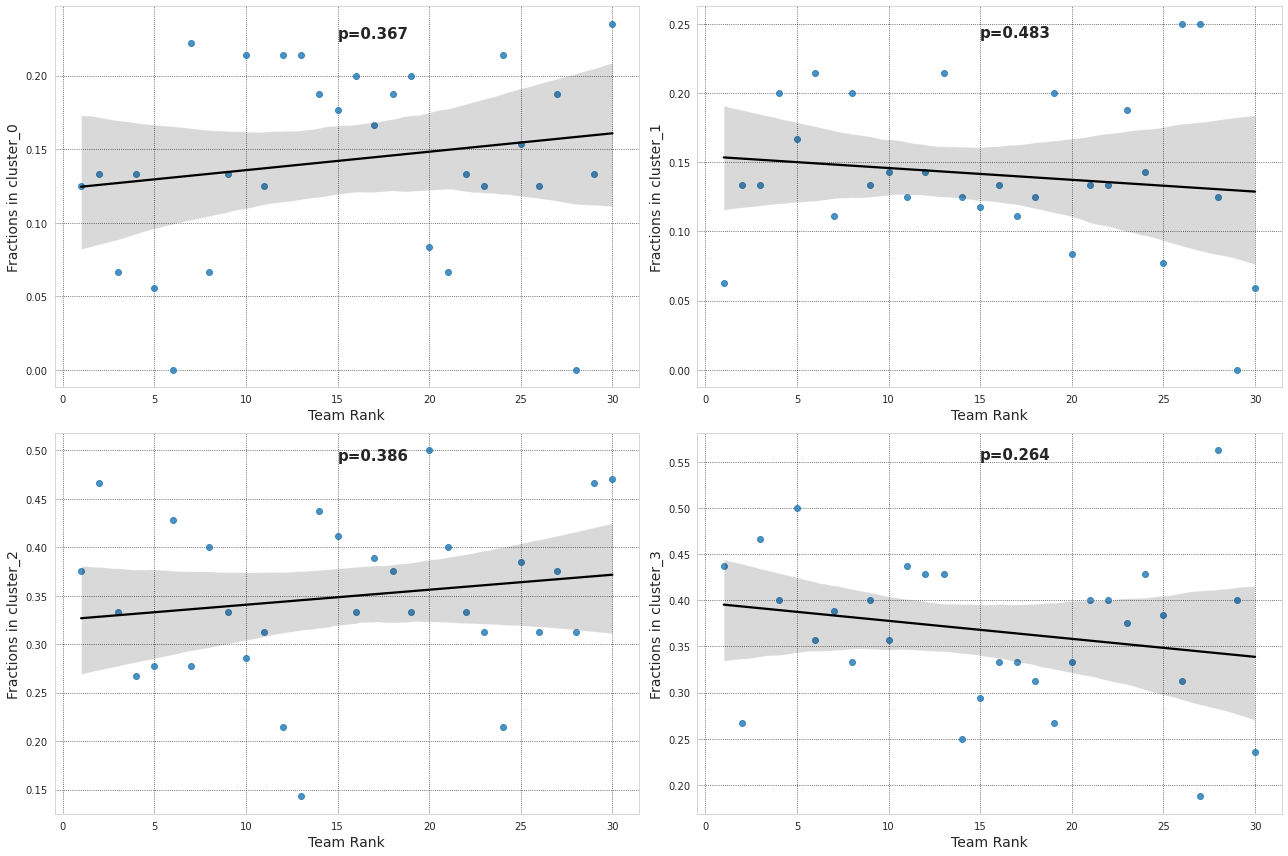

In [64]:
plt.figure(figsize = [18, 12])
plt.subplot(2,2,1)
reg_plot('cluster_0')
plt.subplot(2,2,2)
reg_plot('cluster_1')
plt.subplot(2,2,3)
reg_plot('cluster_2')
plt.subplot(2,2,4)
reg_plot('cluster_3')
plt.tight_layout()

We fail to reject the null hypothesis with a significance level of 0.05 that, **β = 0**.

From the above analysis of Team rank and fraction of players in each cluster it is clear that there is no significance when applying linear regression to all four plots. This suggests that there is no relationship between how good a team is and membership in a particular cluster. All clusters are equally important, suggesting there is no one type of player that dominates the NBA.

### Average Variance and Mean Absolute Deviation of Teams

In [65]:
df_pmatch['Tm'] = df_2021['Tm']
df_pmatch['cluster_id'] = df_2021['cluster_id']

tdf = df_pmatch.merge(team_ranks, how = 'inner', on = 'Tm')

In [66]:
#variance of player performance for each team

for t in tdf.Tm.unique():
    team_ranks.loc[team_ranks.Tm == t, 'team_variance'] = np.sqrt(np.mean(tdf.loc[tdf.Tm == t, perf_features].var()**2))

In [67]:
#distance of players from team centroids

for i in range(tdf.shape[0]):
    tdf.loc[i, 'dist'] = np.sqrt(np.mean((tdf.loc[i, perf_features] - tdf.loc[tdf.Tm == tdf.loc[i,'Tm'], perf_features].mean())**2))

In [68]:
#Mean absolute deviation of every team

team_ranks = team_ranks.merge(tdf.groupby('Tm').dist.mean().reset_index(), how = 'inner', on = 'Tm')
team_ranks.head()

,Rk,Team,Tm,cluster_0,cluster_1,cluster_2,cluster_3,team_variance,dist
0,1,Utah Jazz,UTA,0.125000,0.062500,0.375000,0.437500,17.110929,2.479411
1,2,Los Angeles Clippers,LAC,0.133333,0.133333,0.466667,0.266667,12.872297,1.881223
2,3,Phoenix Suns,PHO,0.066667,0.133333,0.333333,0.466667,11.563976,1.863678
3,4,Milwaukee Bucks,MIL,0.133333,0.200000,0.266667,0.400000,17.252125,2.396296
4,5,Philadelphia 76ers,PHI,0.055556,0.166667,0.277778,0.500000,14.598795,2.171961


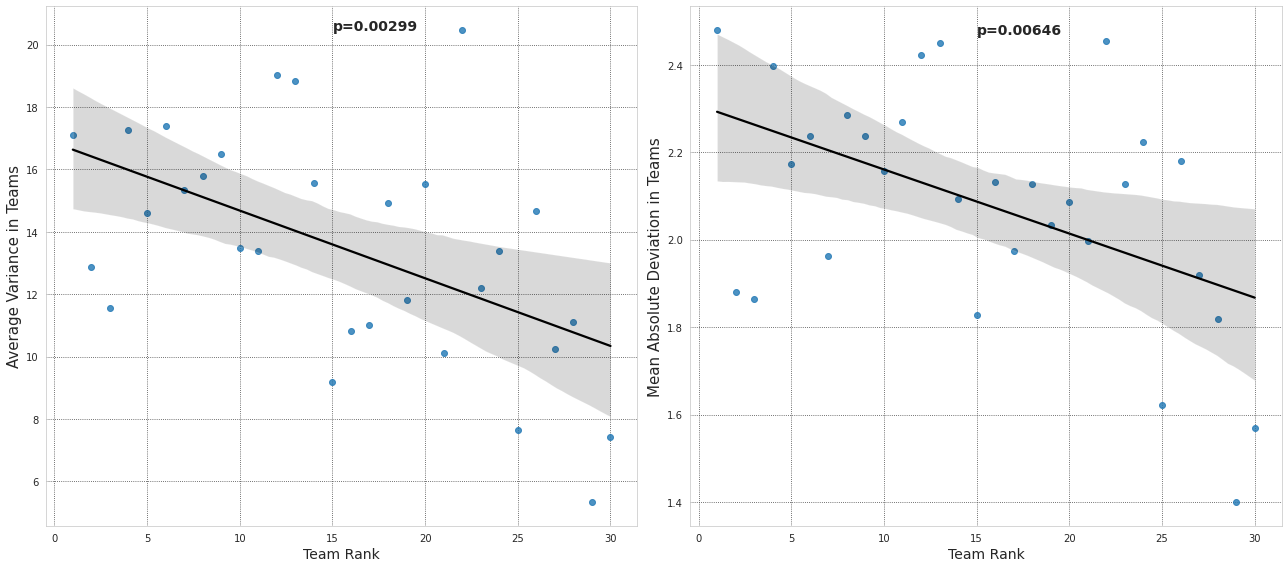

In [69]:
plt.figure(figsize = [18, 8])

#Average Variance in each dimention
plt.subplot(1,2,1)
sns.regplot(team_ranks['Rk'], team_ranks['team_variance'], line_kws={'color':'k'})
plt.text(15, max(team_ranks['team_variance'])-0.01, 'p={}'.format(build_model('team_variance').pvalues[1].round(5)), fontsize = 14, fontweight = 'bold')
plt.xlabel('Team Rank', fontsize = 14)
plt.ylabel('Average Variance in Teams', fontsize = 15)

#Mean Absolute Deviation
plt.subplot(1,2,2)
sns.regplot(team_ranks['Rk'], team_ranks['dist'], line_kws={'color':'k'})
plt.text(15, max(team_ranks['dist'])-0.01, 'p={}'.format(build_model('dist').pvalues[1].round(5)), fontsize = 14, fontweight = 'bold')
plt.xlabel('Team Rank', fontsize = 14)
plt.ylabel('Mean Absolute Deviation in Teams', fontsize = 15)

plt.tight_layout()

From the analysis of spread of players in each team, we reject the null hypothesis, that **β = 0**, with a significance level of 0.05. This indicates that there indeed is a significant relationship between the team ranks and the average variance and mean absolute deviation on performance metrics for teams.

It looks like better teams have players more spread apart, while worse teams are more grouped together. This result is revealed through a p-value of **0.00299** and **0.00646** for the slopes in linear regression.

The results indicate that strong teams have players whose success cannot be attributed to fundamentals alone. Players being more spread apart on the performance metrics space means that the team has more diversity and diversity in turn ensures that the players' skillsets complement each other.